# Markovske verige / Markov chains

Markovske verige (ali Markovski proces) je stohastični model, ki opisuje zaporedje možnih dogodkov, pri katerem je verjetnost vsakega dogodka odvisna samo od stanja prejšnjega dogodka. Lahko ga uporabljamo kot analitično orodje ali kot generator/simulator psevdo naključnih zaporedij.

> Markov chains (or Markov process) is a usefull tool that can be used either as an analytical tool or (more frequently) as in input/output simulator that allows us to generate semi-random sequences of events.

Model opišemo s stanji (vozlišči v grafu) in prehodi med njimi (podajajo verjetnost prehoda), torej uporabljamo zapis z grafi. 
> In it's most basic form the process consists of states (graph nodes) and transitions between them (edges). This means that we are once again dealing with a bi-directional graph, adjacency matrices and probabilities.

Pri vaji uporabljamo knjižnice ter markov.py, kjer so definirane funkcije za simuliranje primerov vaje.

> We will use some imported libraries. Note that one of the imports (markov.py) is a custom library for Markov chains included in the exercise.

In [2]:
import numpy as np
from math import sqrt
import networkx as nx
import matplotlib.pyplot as plt
import markov as mk
import warnings
warnings.filterwarnings('ignore')

## Markovska veriga kot generator stanj / Sequence generator - throwing the dice

### Primer 1: met kocke

Za prvi primer bomo uporabili Markovsko verigo kot generator naključnih spremenljivk. Bolj natančno bomo s pomočjo verige simulirali met kocke.
Pri tem je potrebno določiti:
* Število stanj
* Prehode med njimi
* Verjetnost posameznega prehoda : prehodna matrika (Adjacency/Transition matrix)
* Začetne verjetnosti stanj, ki določajo začetno stanje simulacije.

V ta namen uporabimo simulacijo kocka.py, ki nam tudi izriše histogram posameznih metov.

> In this example we will use the Markov process as a generator of random states, which will in our case mean the number that has fallen on the thrown dice. To do this we must define our MP by giving the following: Number of states, Transitions between states, Probability of each transition.

> The number of states is a simple integer number, which defines the dimensions of the adjacency matrix. The transitions and the probabilities are merged in the form similar to the adjacency matrix from the graph theory. A non-zero number indicates that a transition is possible, while the value  equals to the probability of that transition. An additional rule is that the sum of all elements in a row must be equal to 1 in order to cover all the posibilities. For our example - a single 6-sided die we therefore have 6 states and the transitions between them is allways 1/6 (assuming we're working with a fair dice).

> Last but not least we define the starting state probability which is used to determine in which state the simulation starts. In our case it is a vector of 1/6 since we (again) assume an equal chance of each side.

Adjacency matrix:  [[0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
 [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
 [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
 [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
 [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
 [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]]
Starting state:  0
Starting simulation, steps:  5000
Simulated data (state sequence):
Probabilities of states : 
[0.1742 0.171  0.1666 0.1616 0.1698 0.1568]


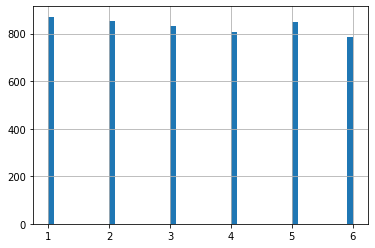

In [14]:
n = 6   # number of states
steps = 5000 # how many throws to simulate
pi=[1.0/6,1.0/6,1.0/6,0.0/6,1.0/6,1.0/6] # starting state probability

# Adjacency matrix generation (with probabilities) TRANSITION MATRIX
# Prehodna matrika
T = np.ones((n,n))
T = T / 6.0

#T[0,1]=1
#T[2,2]=1

print("Adjacency matrix: ", T)


# we then select the starting state
s = mk.next_state(pi)
print("Starting state: ", s)

#run the simulation for the determined ammount of steps in the graph
#
print("Starting simulation, steps: ", steps )
data = mk.runSimulation(s,T,steps)

print("Simulated data (state sequence):")
# print(data)

# Get the accumulated probabilities (and plot them in a histogram)
print("Probabilities of states : ")
print( mk.getStateStats(data, True))

plt.figure()
n, bins, patches = plt.hist(data, 50,  histtype='bar')
plt.grid(True)

We can of course plot our states as a bidirectional graph, as we learned in exercise 3.

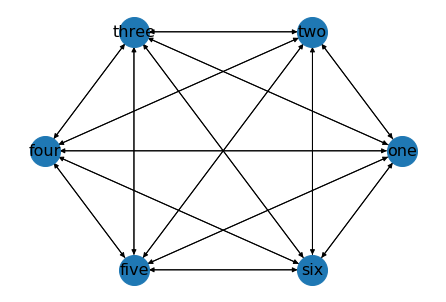

In [15]:
labels = {0:"one",1:"two",2:"three",3:"four",4:"five",5:"six"}

mk.plotStates(T,labels)

plt.show()


### Generiranje tranzicijske matrike iz podatkov simulacije

Funkcija buildMatrix nam omogoča, da iz dejanskih podatkov stanj simulacije generiramo matriko prehodov stanj.

> We can also reverse the process and create the transition matrix from the observed states using the appropriate function.

In [16]:
B = mk.buildMatrix(False,data)
#print(data)
print("Transition matrix estimated from simulated data: ")
print( B)
print("")
print("RMSE error of the estimated matrix : ")
print (mk.getRMSE(T,B))

Transition matrix estimated from simulated data: 
[[0.18735632 0.15287356 0.15402299 0.16206897 0.17586207 0.16781609]
 [0.17192982 0.17309942 0.18011696 0.17777778 0.15321637 0.14385965]
 [0.16806723 0.16566627 0.16926771 0.17166867 0.16086435 0.16446579]
 [0.17326733 0.17574257 0.17079208 0.14727723 0.17450495 0.15841584]
 [0.17196702 0.19199058 0.16961131 0.14487633 0.16725559 0.15429918]
 [0.17219388 0.16709184 0.15561224 0.16581633 0.18877551 0.1505102 ]]

RMSE error of the estimated matrix : 
0.0699361421754641


### Vprašanja :

* Spreminjaj število poskusov in opazuj histogram porazdelitve stanj. Koliko poskusov potrebuješ, da bo končna verjetnost stanj približno enaka teoretični? 

* Koliko poskusov potrebuješ, da bo napaka ocene tranzicijske matrike iz podatkov (RMSE) manjša od 0.1?

### Naloga 1 : 

* Napiši kodo (na osnovi primera zgoraj), ki simulira met dveh kock (dodaj še eno kocko), nato pa prikaže histogram (graf) vsote števila pik obeh kock. Kakšne so verjetnosti vsote dveh kock? 

* (Bonus) Simuliraj dve kocki, kjer je ena kocka nepoštena (vsa stanja niso enako verjetna). Kako to vpliva na vsoto dveh kock (graf)?


Modify the example to simulate two dies:
* Task 1: Modify the existing example to simulate throwing two dice simultaneously. Sum resulting state sequences of two dices, and draw histogram of resulting numbers (states). 
* Based on the results calculate the probability of each sum of two dices.
* Task 2: Create a new transition matrix with new states and use it for the simulation (a new model, which simulates throwing two dices simoultaneously)
* How many throws do we need to get a low RMSE (< 0.01)?
* Bonus: compare the results, if one dice is biased (some numbers have different probability). 
* Task 3 (Bonus): introduce hidden state (Hidden Markov model) and perform the experiments, compare and comment the results. For example, a hidden state can represent if a fair or cheating dices are used in a two-dice experiment (similar to the last example).

In [ ]:
# Simuliranje dveh kock in graf vsote pik





### Dodatna naloga 1 (Bonus)

Pripravi nov model, ki simulira hkratni met dveh kock, z definiranimi stanji (vsota pik) in matriko prehodov (tranzicijsko matriko). Izračunaj, kakšne so teoretične vrednosti prehodov. Nariši graf stanj. 

Primerjaj rezultate te simulacije z rezultatom simulacij dveh kock zgoraj.



## Markovska veriga - analitično orodje / Analytical tool

Analiziramo lahko pogostost pojavljanja posameznih stanj v sistemu. Primer je spletna trgovina.

Ponudnik spletne trgovine želi posodobiti svojo infrastrukturo tako, da bo ji bo dodal novejši (zmoglivejši) strežnik. Zaradi tehničnih omejitev (obstoječi IP naslovi, zunanji ponudniki itd.) ne more na novi strežnik prestaviti vse elemente svoje spletne ponudbe. Zato mora sedaj izbrati elemente za katere meni, da bodo s strani uporabnikov najbolj pogosto obiskane (in jih je torej smiselno prestaviti na zmogljivejši strežnik). 

Ker mu uporaba sledilnih piškotkov ni bila dovoljena (oziroma se večina uporabnikov ni strinjala z uporabo le-teh) je lahko skozi leta s pomočjo dnevnika na strežniku (clickstream) ponudnik samo sledil zaporedju naloženih elementov. S pomočjo poznavaja obstoječih povezav med elementi je lahko izračunal verjetnost klika na posamezno povezavo na vsaki spletni strani. Izračunane verjetnosti so prikazane na spodnji sliki.

S pomočjo tako izdelane matrike želimo sedaj ugotoviti na katerih elementih, bodo uporabniki preživeli največ časa. Te elemente se zato splača prestaviti na zmogljivejši strežnik.


> We can also use the MP to get the analysis of how often each state occurs. An example of this is as follows:

> A website provider is planning to upgrade his infrastructure by adding a new server. Due to technical
limitations the provider cannot move all of the content of the webpage to the new server, but must select
only the elements that will be the most visited by the users.
Since the provider doesn’t use tracking cookies (due to regulations) he was only able to keep a clickstream
log of the activities on the server. Knowing the sequence of loaded elements we were able to create a
transition matrix of the website.
Using this matrix we can calculate the statistics of each element and determine which elements will be
visited the most.

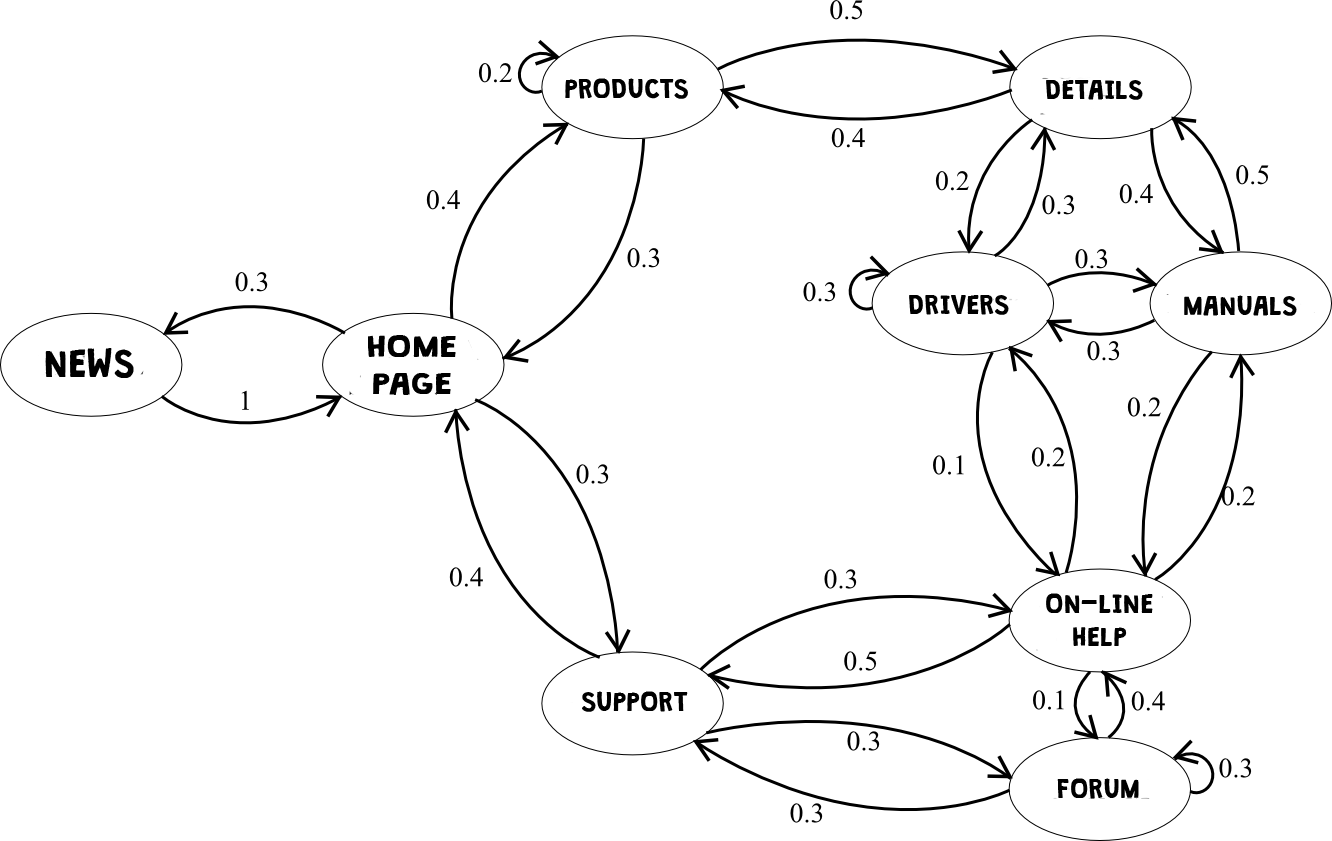

[[0.  1.  0.  0.  0.  0.  0.  0.  0. ]
 [0.3 0.  0.4 0.  0.  0.  0.  0.  0.3]
 [0.  0.3 0.2 0.5 0.  0.  0.  0.  0. ]
 [0.  0.  0.4 0.  0.2 0.4 0.  0.  0. ]
 [0.  0.  0.  0.3 0.3 0.3 0.1 0.  0. ]
 [0.  0.  0.  0.5 0.  0.  0.2 0.  0. ]
 [0.  0.  0.  0.  0.2 0.2 0.  0.1 0.5]
 [0.  0.  0.  0.  0.  0.  0.4 0.  0.3]
 [0.  0.4 0.  0.  0.  0.  0.3 0.3 0. ]]
[0.075 0.225 0.075 0.05  0.05  0.05  0.15  0.075 0.25 ]
1.0


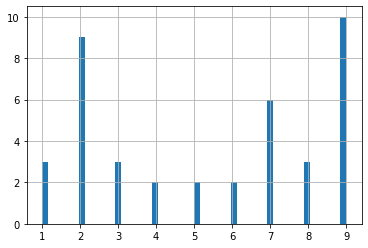

<Figure size 432x288 with 0 Axes>

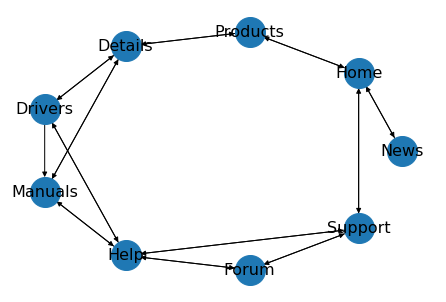

In [29]:
# Stanja:
labels = {0:"News",1:"Home",2:"Products",3:"Details",4:"Drivers",5:"Manuals",6:"Help",7:"Forum",8:"Support"}

n=9;
s=1;
steps = 40;
T = np.zeros((n,n));
T[0,1] = 1;
T[1,0] = 0.3;
T[1,2] = 0.4;
T[2,1] = 0.3;
T[2,2] = 0.2;
T[2,3] = 0.5;
T[3,2] = 0.4;
T[3,4] = 0.2;
T[4,3] = 0.3;
T[3,5] = 0.4;
T[5,3] = 0.5;
T[4,4] = 0.3;
T[4,5] = 0.3;
T[4,6] = 0.1;
T[6,4] = 0.2;
T[5,6] = 0.2;
T[6,5] = 0.2;
T[6,7] = 0.1;
T[7,6] = 0.4;
T[6,8] = 0.5;
T[8,6] = 0.3;
T[7,8] = 0.3;
T[8,7] = 0.3;
T[8,1] = 0.4;
T[1,8] = 0.3;

print(T)

data = mk.runSimulation(s,T,steps)

print (mk.getStateStats(data, True))
print (sum(mk.getStateStats(data,True)))

plt.figure()
n, bins, patches = plt.hist(data, 50,  histtype='bar')
plt.grid(True)


# Graf prehodov stanj
plt.figure()
mk.plotStates(T, labels)
plt.show()


### Naloga 2:

* Preskusi model, in preveri potrebno število korakov simulacije. Kakšne so verjetnosti obiskov posameznih strani, katere so najbolj obremenjene, koliko korakov potrebuješ za zanesljiv rezultat?

* Spremeni matriko prehodov, tako da dodaš na vsaki strani možnost (povezavo) na začetno stran (Home)



## Skrita Markovska veriga / Hidden Markov Model

Hidden Markov Model (HMM) vsebuje dodatna 'skrita' stanja, ki jih uporabni ne vidi. Najprej se določi skrita stanja, nato pa še vidna stanja. Pri tem je največkrat vprašanje, koliko je skritih stanj, ter kakšne so njihove vrednosti. 

>Hidden Markov Model (HMM) works by having two 'sets' of states. Hidden states which cannot be seen by the end user (and are usualy very hard to determine or create) and 'seen' states which are the output given by each hidden state.
The process of using the model also changes - in the first phase we deteremine into which hidden state the system transits (same as the usual model) and in the second phase we select the output given by the current state.

> The challenge of using the HMM usually lies in: determining the number of hidden states,  detecting which is the 'current' hidden state

### Primer: goljufiva kocka / Cheating dice

V kasinoju ima krupje na voljo ‘fer’ in ‘goljufivo’ kocko. Pripravimo  model, ki bo upošteval dejstvo, da lahko krupje vedno zamenja kocko s katero igra. Rezultat, ki ga vidimo kot igralci je vedno samo številka, ki je padla na kocki.

Vemo sledeče: Dvakrat bolj verjetno je, da bo uporabljena pravilna kocka, Krupje nerad menja kocke, Prava kocka ima vse številke enako verjetne, Pri ‘goljufivi’ kocki v polovici primerov pade šestica

>A casino croupier has the option of using fair or cheating dice. Knowing that he can always change the dice
we make a HMM model. Note that all the players see are the numbers that show on the dice.
We know the following:  Fair dice is twice as likely to be used, Croupier dislikes changing dice,  With fair dice all the numbers have equal probabilities, 6 shows up in half the throws of the cheating dice.

[[0.95 0.05]
 [0.1  0.9 ]]
[[0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
 [0.1        0.1        0.1        0.1        0.1        0.5       ]]
Sequence of hidden states:
[0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1]
Observed states:
[5 0 3 5 1 0 1 1 4 5 0 5 5 5 4 2 1 5 5 3 4 0 4 0 0 3 3 0 3 0 1 3 5 4 3 2 4
 2 3 2 1 1 5 0 4 3 5 5 1 5 2 4 2 0 0 1 2 2 0 3 4 3 0 3 3 0 4 1 0 3 5 0 2 5
 1 5 3 3 5 3 1 5 5 2 4 5 4 0 2 2 5 1 0 3 1 0 2 4 5 4]


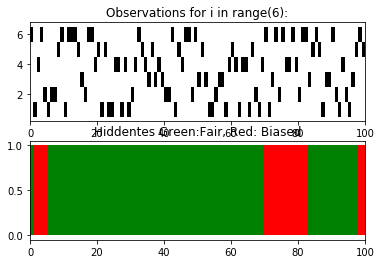

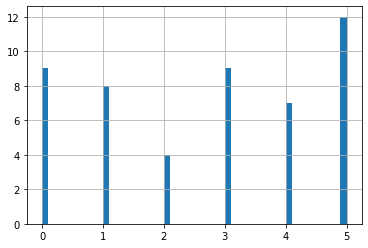

In [35]:
pi=np.array([2.0/3,1.0/3]) #starting state probability

# State Transition matrix for the hidden states 
# chance of dice change
A=np.array([[.95,.05],[.1,.9]]) 
print(A)

# Probabilities of numbers for the fair and cheating dice
B=np.array([  [1.0/6 for i in range(6)],
            [.1,.1,.1,.1,.1,.5]]) 
print(B)

num = 100 #number of throws
  
hidden=np.array(mk.create_hidden_sequence(pi,A,num))
print("Sequence of hidden states:")
print(hidden)

print("Observed states:")
observed=np.array(mk.create_observation_sequence(hidden,B,num))
print(observed)
    
#Detecting fair dice
indices_hidden_fair=np.where(hidden==0)[0]
tuples_contiguous_values_fair=list(mk.group(indices_hidden_fair))
tuples_start_break_fair=mk.create_tuple(tuples_contiguous_values_fair)

#Detecting chating dice
indices_hidden_biased=np.where(hidden==1)[0]
tuples_contiguous_values_biased=list(mk.group(indices_hidden_biased))
tuples_start_break_biased=mk.create_tuple(tuples_contiguous_values_biased)

#Plot
observation_tuples=[]
for i in range(6):
    observation_tuples.append(mk.create_tuple(mk.group(list(np.where(observed==i)[0]))))

#print(observation_tuples[0])
#print(observed+1)

plt.subplot(2,1,1)
plt.xlim((0,num));
plt.title('Observations for i in range(6):')
plt.broken_barh(observation_tuples[5],(5+0.5,1),facecolor='k');
plt.broken_barh(observation_tuples[4],(4+0.5,1),facecolor='k');
plt.broken_barh(observation_tuples[3],(3+0.5,1),facecolor='k');
plt.broken_barh(observation_tuples[2],(2+0.5,1),facecolor='k');
plt.broken_barh(observation_tuples[1],(1+0.5,1),facecolor='k');
plt.broken_barh(observation_tuples[0],(0+0.5,1),facecolor='k');
plt.subplot(2,1,2);
plt.xlim((0,num));
plt.title('Hiddentes Green:Fair, Red: Biased');
plt.broken_barh(tuples_start_break_fair,(0,1),facecolor='g');
plt.broken_barh(tuples_start_break_biased,(0,1),facecolor='r');
plt.show()

# Plot a histogram of dice values for selected time interval
plt.figure()
n, bins, patches = plt.hist(observed[1:50], 50,  histtype='bar')
plt.grid(True)

### Naloga 3:

Odgovori na vprašanja:
* Kaj pomenijo posamezni izpisi tega programa, ter komentiraj prikaz na grafih.
* Koliko je skritih stanj, kakšne so možne vrednosti, in kakšne so njihove verjetnosti.

* Izriši histogram vrednosti kocke za celoten poskus, ter za časovne intervale, ko je bila uporabljena prava in goljufiva kocka.

* Spremeni verjetnost uporabe goljufive kocke, da bo uporabljena večino časa, in primerjaj rezultate simulacije.

* Kako bi ugotovil, ali je krupje nekaj časa uporabljal goljufivo kocko? Koliko časa bi lahko krupje uporabljal goljufivo kocko, ne da bi igralci to opazili?


